### Predict the concrete strength 

A simple neural network and Linear regression based concrete strength prediction. Let import some library first

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Now, it's time to import the dataset. Note- Data is already available in data folder

In [2]:
data = pandas.read_excel("data/Concrete_Data.xls")

Lets see the summary of our dataset

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


if want to get the indepth detail go to this url : https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Now, let's seprate the input and output variable

###### Input Variable


In [7]:
inpt_colmn = ['Cement (component 1)(kg in a m^3 mixture)',
         'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
         'Fly Ash (component 3)(kg in a m^3 mixture)',
         'Water  (component 4)(kg in a m^3 mixture)',
         'Superplasticizer (component 5)(kg in a m^3 mixture)',
         'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
         ]
input_var = data[inpt_colmn]


###### Output Variable

In [8]:
outpt_colm = ['Fine Aggregate (component 7)(kg in a m^3 mixture)',
              'Age (day)',
              'Concrete compressive strength(MPa, megapascals) ']
output_var = data[outpt_colm]

Let's visualize the distribution of the input variables

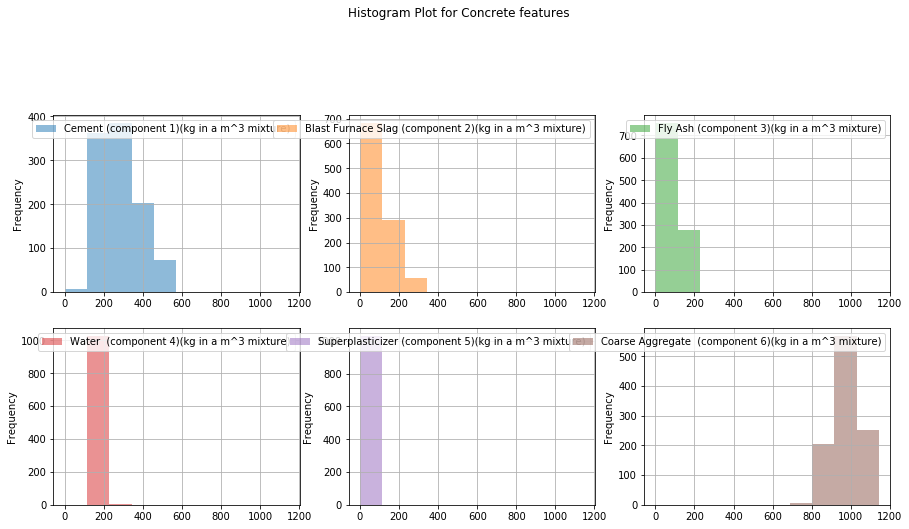

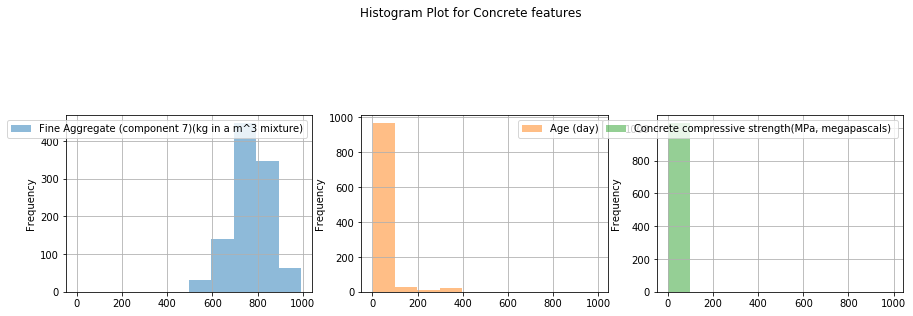

In [9]:
input_var.plot(kind='hist',subplots=True, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True,
                 title="Histogram Plot for Concrete features")
plt.show()

output_var.plot(kind='hist',subplots=True, layout=(4,3), figsize=(15,15),sharex=False,alpha=.5,grid = True,
                 title="Histogram Plot for Concrete features")
plt.show()

###### Let's find out the correlation between input variables 

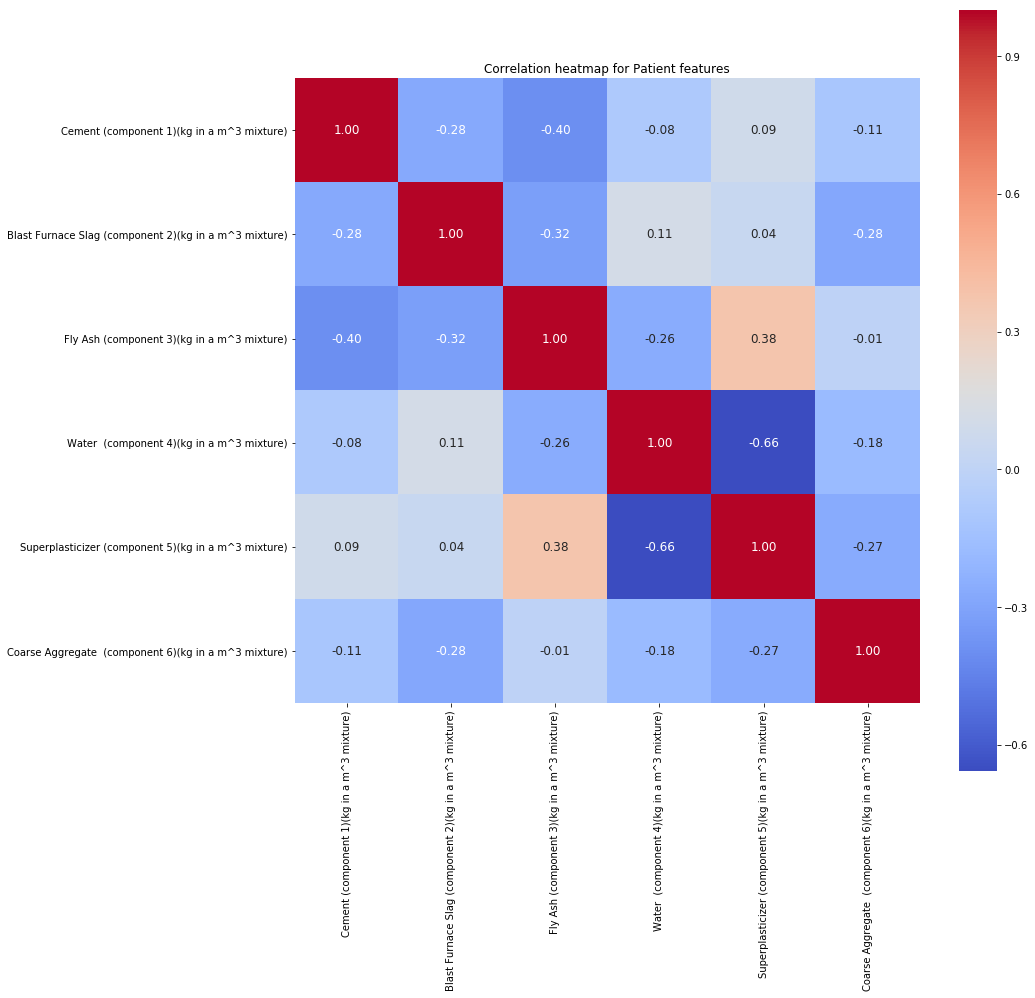

In [11]:
correlations = input_var.corr()

plt.figure(figsize=(14,14))
plt.title("Correlation heatmap for Patient features")
temp = sns.heatmap(correlations, cbar = True,  square = True, annot=True, 
            fmt= '.2f',annot_kws={'size': 12}, cmap= 'coolwarm') 
plt.show()

So, input variables are uncorrelated.

##### Lets findout the strength of the concrete using linear regression and Neural Network

Divide the data in to train and test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(input_var.get_values(), output_var['Concrete compressive strength(MPa, megapascals) '].get_values(), test_size=0.40, random_state=42)


Linear Regression Prediction 

In [14]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
error = mean_squared_error(y_test,y_pred)
print(error)

167.118999119


NN Prediction

In [15]:
ml_regr = MLPRegressor()
ml_regr.fit(X_train,y_train)
y_pred = ml_regr.predict(X_test)
error = mean_squared_error(y_test,y_pred)
print(error)

167.062293337


As you see above the error is bit high, best way it to make your network more deep and try with different activation function